In [1]:
import sys
sys.path.append('../src')

import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## 1. Load and Augmenting Dataset

In [2]:
DATASET_PATH = "../dataset"
OUTPUT_PATH = "../data/processed"
from data_preprocessing import load_dataset, generate_unknown_class, augment_dataset
try:
    # Test loading dataset
    images, labels, class_names = load_dataset(DATASET_PATH)
    
    # # Generate unknown class (out-of-distribution)
    # images, labels = generate_unknown_class(images, labels, unknown_ratio=0.15)
    
    # Test augmentation (with smaller factor for testing)
    augmented_images, augmented_labels = augment_dataset(images, labels, augmentation_factor=0.3)
    
    # Display results
    print("\n" + "="*60)
    print("FINAL RESULTS:")
    print("="*60)
    
    print(f"\nOriginal dataset:")
    print(f"   - Images shape: {images.shape}")
    print(f"   - Labels shape: {labels.shape}")
    
    print(f"\nAugmented dataset:")
    print(f"   - Images shape: {augmented_images.shape}")
    print(f"   - Labels shape: {augmented_labels.shape}")
    print(f"   - Total increase: {len(augmented_images) - len(images)} images")
    
    print("\n" + "="*60)
    print("TEST COMPLETED SUCCESSFULLY!")
    print("="*60)
    
except Exception as e:
    print(f"\nError during testing: {e}")
    import traceback
    traceback.print_exc()

Loading dataset from: f:\COURSES\ML\Project\notebooks\..\dataset
Loading 385 images from 'glass' (ID: 0)


Loading glass: 100%|██████████| 385/385 [00:00<00:00, 1464.05it/s]


Loading 449 images from 'paper' (ID: 1)


Loading paper: 100%|██████████| 449/449 [00:00<00:00, 1305.37it/s]


Loading 247 images from 'cardboard' (ID: 2)


Loading cardboard: 100%|██████████| 247/247 [00:00<00:00, 1325.02it/s]


Loading 363 images from 'plastic' (ID: 3)


Loading plastic: 100%|██████████| 363/363 [00:00<00:00, 1424.36it/s]


Loading 315 images from 'metal' (ID: 4)


Loading metal: 100%|██████████| 315/315 [00:00<00:00, 1355.82it/s]


Loading 106 images from 'trash' (ID: 5)


Loading trash: 100%|██████████| 106/106 [00:00<00:00, 1417.34it/s]
f:\COURSES\ML\Project\notebooks\../src\data_preprocessing.py:61: UserWarning: Argument(s) 'var_limit, mean' are not valid for transform GaussNoise
  A.GaussNoise(



Dataset loaded successfully!
Total images: 1865
Image shape: (224, 224, 3)
Data Columns Names: N/A

Class distribution:
  0 (glass): 385 images
  1 (paper): 449 images
  2 (cardboard): 247 images
  3 (plastic): 363 images
  4 (metal): 315 images
  5 (trash): 106 images
  6 (unknown): 0 images

STARTING DATA AUGMENTATION

Original dataset size: 1865
Augmentation factor: 0.3 (30.0%)
Augmented samples to generate: 559
Target total size: 2424

Augmenting each class proportionally...
  glass: generating 115 augmented images...


  paper: generating 134 augmented images...


  cardboard: generating 74 augmented images...


  plastic: generating 108 augmented images...


  metal: generating 94 augmented images...


  trash: generating 31 augmented images...



AUGMENTATION COMPLETE
Final dataset size: 2421
Increase: 556 images
Actual increase: 29.8%

Augmented class distribution:
  glass: 385 → 500 (+115)
  paper: 449 → 583 (+134)
  cardboard: 247 → 321 (+74)
  plastic: 363 → 471 (+108)
  metal: 315 → 409 (+94)
  trash: 106 → 137 (+31)

FINAL RESULTS:

Original dataset:
   - Images shape: (1865, 224, 224, 3)
   - Labels shape: (1865,)

Augmented dataset:
   - Images shape: (2421, 224, 224, 3)
   - Labels shape: (2421,)
   - Total increase: 556 images

TEST COMPLETED SUCCESSFULLY!


## 2. Test Feature Extraction Methods

TESTING ENHANCED FEATURE EXTRACTION

📷 Test Image:
  - Shape: (224, 224, 3)
  - Class: glass
  - Data type: uint8


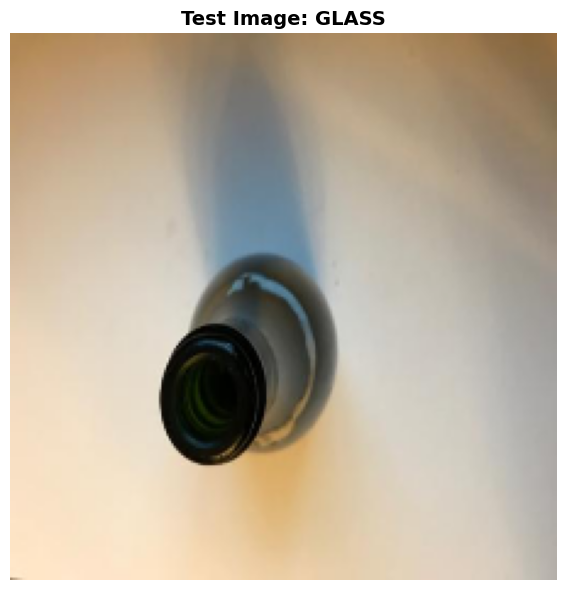


🔍 ENHANCED Feature Breakdown:
  ✓ HOG with CLAHE:           6084 features (edge structure)
  ✓ Color with Equalization:   105 features (HSV + moments)
  ✓ LBP with Multi-scale:       54 features (3 radii texture)
  ✓ Gabor Filters (NEW):        36 features (orientation/frequency)
  ✓ GLCM Texture (NEW):         10 features (spatial relationships)
  ✓ Hu Moments (NEW):            7 features (shape invariants)
  ✓ Edge Stats (NEW):            6 features (density/sharpness)
  📦 Combined (Normalized):   6256 features

💡 Feature Engineering for Glass/Plastic/Metal Distinction:
  • Gabor: Captures reflective vs matte textures
  • GLCM: Distinguishes homogeneous (glass) vs textured (plastic)
  • Edge: Sharp edges (glass/metal) vs soft (plastic)
  • Shape: Container form factors across materials


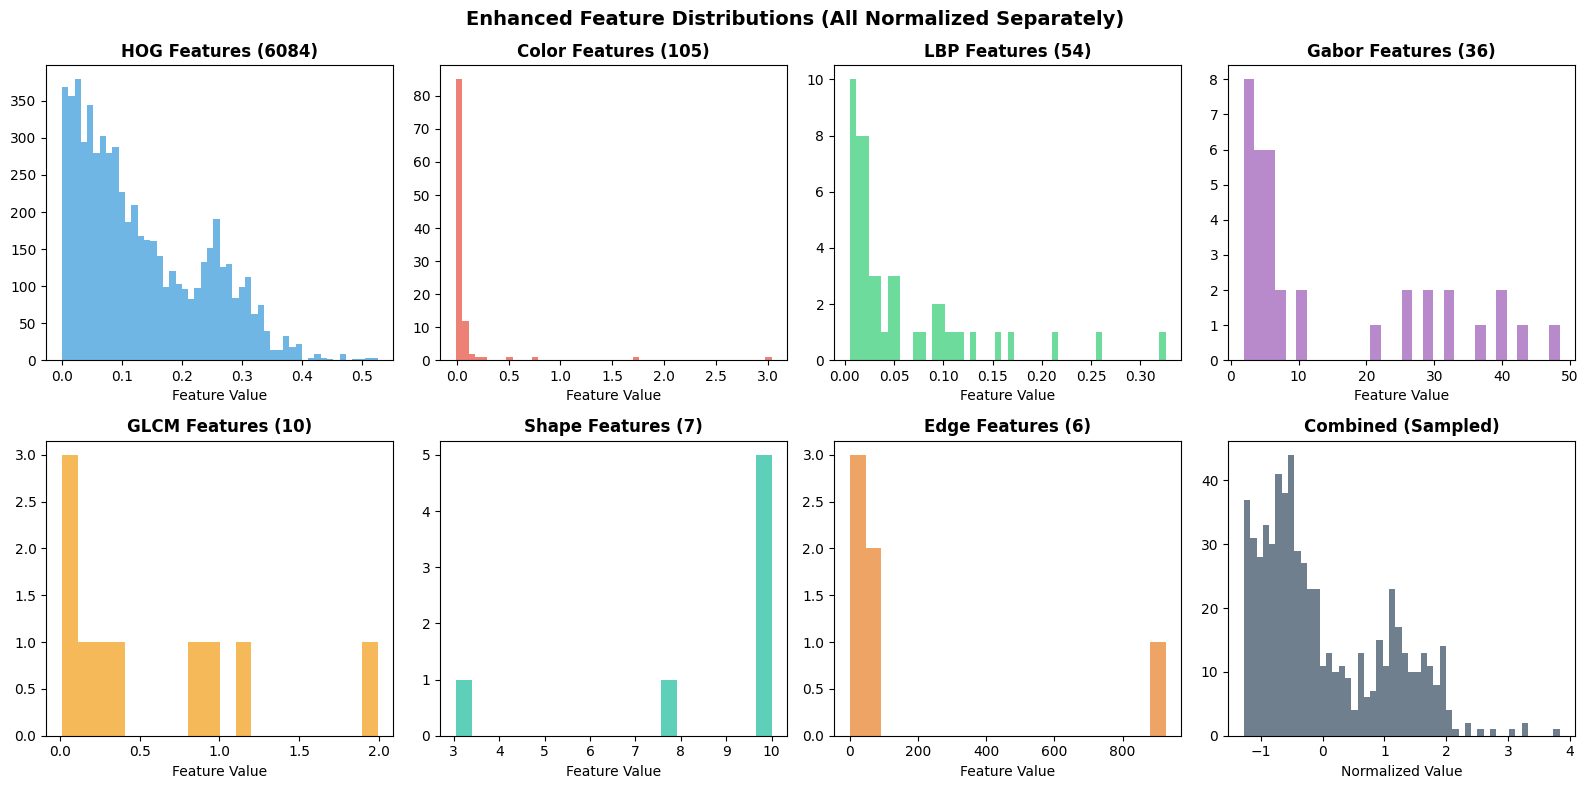


✅ All feature types normalized separately for equal voting power
✅ New features specifically target glass/plastic/metal confusion


In [3]:
print("="*60)
print("TESTING ENHANCED FEATURE EXTRACTION")
print("="*60)

# Define CLASS_NAMES dictionary for reference
CLASS_NAMES = {
    0: 'glass', 
    1: 'paper', 
    2: 'cardboard', 
    3: 'plastic', 
    4: 'metal', 
    5: 'trash'
}

# Get a test image
test_idx = 100
test_image = augmented_images[test_idx]
test_label = augmented_labels[test_idx]

print(f"\n📷 Test Image:")
print(f"  - Shape: {test_image.shape}")
print(f"  - Class: {CLASS_NAMES[test_label]}")
print(f"  - Data type: {test_image.dtype}")

# Display the test image
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
ax.imshow(test_image_rgb)
ax.set_title(f'Test Image: {CLASS_NAMES[test_label].upper()}', fontsize=14, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

# Import enhanced feature extraction functions
from feature_extraction import (
    extract_hog_features, 
    extract_color_histogram, 
    extract_lbp_features,
    extract_gabor_features,
    extract_glcm_features,
    extract_shape_features,
    extract_edge_features,
    extract_combined_features
)

# Extract each feature type separately
hog_feat = extract_hog_features(test_image)
color_feat = extract_color_histogram(test_image, bins=32)
lbp_feat = extract_lbp_features(test_image)
gabor_feat = extract_gabor_features(test_image)
glcm_feat = extract_glcm_features(test_image)
shape_feat = extract_shape_features(test_image)
edge_feat = extract_edge_features(test_image)
combined_feat = extract_combined_features(test_image)

print(f"\n🔍 ENHANCED Feature Breakdown:")
print(f"{'='*60}")
print(f"  ✓ HOG with CLAHE:          {len(hog_feat):>5} features (edge structure)")
print(f"  ✓ Color with Equalization: {len(color_feat):>5} features (HSV + moments)")
print(f"  ✓ LBP with Multi-scale:    {len(lbp_feat):>5} features (3 radii texture)")
print(f"  ✓ Gabor Filters (NEW):     {len(gabor_feat):>5} features (orientation/frequency)")
print(f"  ✓ GLCM Texture (NEW):      {len(glcm_feat):>5} features (spatial relationships)")
print(f"  ✓ Hu Moments (NEW):        {len(shape_feat):>5} features (shape invariants)")
print(f"  ✓ Edge Stats (NEW):        {len(edge_feat):>5} features (density/sharpness)")
print(f"{'='*60}")
print(f"  📦 Combined (Normalized):  {len(combined_feat):>5} features")
print(f"{'='*60}")

print(f"\n💡 Feature Engineering for Glass/Plastic/Metal Distinction:")
print(f"  • Gabor: Captures reflective vs matte textures")
print(f"  • GLCM: Distinguishes homogeneous (glass) vs textured (plastic)")  
print(f"  • Edge: Sharp edges (glass/metal) vs soft (plastic)")
print(f"  • Shape: Container form factors across materials")

# Visualize feature distributions
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Enhanced Feature Distributions (All Normalized Separately)', fontsize=14, fontweight='bold')

# Plot each feature type
axes[0, 0].hist(hog_feat, bins=50, color='#3498db', alpha=0.7)
axes[0, 0].set_title('HOG Features (6084)', fontweight='bold')
axes[0, 0].set_xlabel('Feature Value')

axes[0, 1].hist(color_feat, bins=50, color='#e74c3c', alpha=0.7)
axes[0, 1].set_title('Color Features (105)', fontweight='bold')
axes[0, 1].set_xlabel('Feature Value')

axes[0, 2].hist(lbp_feat, bins=50, color='#2ecc71', alpha=0.7)
axes[0, 2].set_title('LBP Features (54)', fontweight='bold')
axes[0, 2].set_xlabel('Feature Value')

axes[0, 3].hist(gabor_feat, bins=30, color='#9b59b6', alpha=0.7)
axes[0, 3].set_title('Gabor Features (36)', fontweight='bold')
axes[0, 3].set_xlabel('Feature Value')

axes[1, 0].hist(glcm_feat, bins=20, color='#f39c12', alpha=0.7)
axes[1, 0].set_title('GLCM Features (10)', fontweight='bold')
axes[1, 0].set_xlabel('Feature Value')

axes[1, 1].hist(shape_feat, bins=20, color='#1abc9c', alpha=0.7)
axes[1, 1].set_title('Shape Features (7)', fontweight='bold')
axes[1, 1].set_xlabel('Feature Value')

axes[1, 2].hist(edge_feat, bins=20, color='#e67e22', alpha=0.7)
axes[1, 2].set_title('Edge Features (6)', fontweight='bold')
axes[1, 2].set_xlabel('Feature Value')

axes[1, 3].hist(combined_feat[::10], bins=50, color='#34495e', alpha=0.7)
axes[1, 3].set_title('Combined (Sampled)', fontweight='bold')
axes[1, 3].set_xlabel('Normalized Value')

plt.tight_layout()
plt.show()

print(f"\n✅ All feature types normalized separately for equal voting power")
print(f"✅ New features specifically target glass/plastic/metal confusion")

In [4]:
# Import the function for batch feature extraction
from feature_extraction import extract_features_from_dataset

# Extract features from entire augmented dataset
print("\n" + "="*60)
print("EXTRACTING FEATURES FROM ENTIRE DATASET")
print("="*60)
print(f"Total images to process: {len(augmented_images)}")

all_features = extract_features_from_dataset(augmented_images, method='combined')

print(f"\nFeature extraction complete!")
print(f"Final feature matrix shape: {all_features.shape}")
print(f"  - Samples: {all_features.shape[0]}")
print(f"  - Features per sample: {all_features.shape[1]}")
print(f"\n✓ Ready for classifier training!")


EXTRACTING FEATURES FROM ENTIRE DATASET
Total images to process: 2421

EXTRACTING FEATURES: COMBINED METHOD
Total images: 2421


Extracting features: 100%|██████████| 2421/2421 [01:39<00:00, 24.26it/s]


Feature extraction complete!
Feature matrix shape: (2421, 6256)
Features per image: 6256


Feature extraction complete!
Final feature matrix shape: (2421, 6256)
  - Samples: 2421
  - Features per sample: 6256

✓ Ready for classifier training!


## 3. Feature Scaling (Critical for SVM and k-NN)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data
X = all_features
y = augmented_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply StandardScaler (CRITICAL for SVM and k-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Get actual class names (only classes present in data)
unique_classes = np.unique(y)
actual_class_names = [CLASS_NAMES[i] for i in unique_classes]

print("="*60)
print("DATA PREPARATION COMPLETE")
print("="*60)
print(f"Training set: {X_train_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")
print(f"\nClasses in dataset: {len(unique_classes)}")
print(f"Class names: {actual_class_names}")
print(f"\nFeature scaling applied (StandardScaler)")
print(f"  - Training features: mean=0, std=1")
print(f"  - Test features: scaled using training statistics")
print("="*60)

DATA PREPARATION COMPLETE
Training set: (1936, 6256)
Test set: (485, 6256)

Classes in dataset: 6
Class names: ['glass', 'paper', 'cardboard', 'plastic', 'metal', 'trash']

Feature scaling applied (StandardScaler)
  - Training features: mean=0, std=1
  - Test features: scaled using training statistics


## KNN Classifier

K-NN CLASSIFIER (with Unknown Rejection)

✓ Training completed in 0.02 seconds
✓ Overall Accuracy (without rejection): 50.72%
✓ Rejection rate: 35.05% (170/485 samples)
✓ Confidence threshold: 0.5

CLASSIFICATION REPORT (without rejection):
              precision    recall  f1-score   support

       glass       0.41      0.69      0.52       100
       paper       0.60      0.77      0.68       117
   cardboard       0.54      0.22      0.31        64
     plastic       0.47      0.39      0.43        94
       metal       0.50      0.34      0.41        82
       trash       1.00      0.29      0.44        28

    accuracy                           0.51       485
   macro avg       0.59      0.45      0.46       485
weighted avg       0.54      0.51      0.49       485


CONFUSION MATRIX:


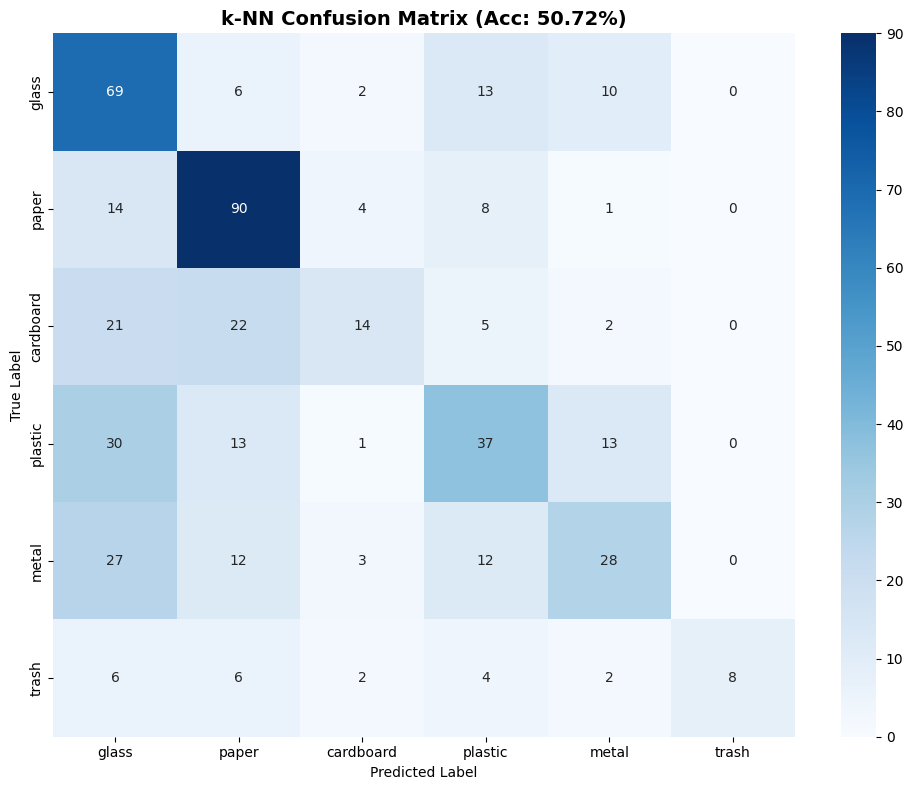

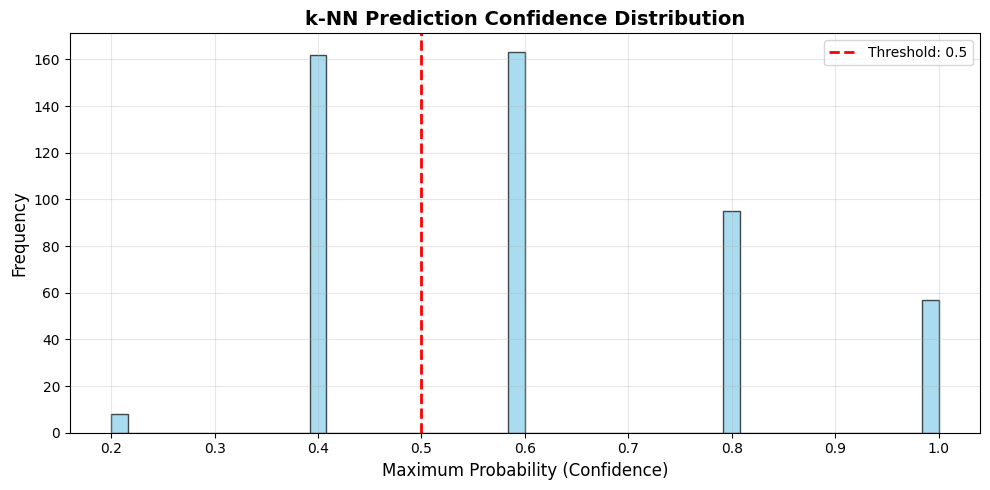


📊 Confidence Analysis:
  - Mean confidence: 0.6128
  - Median confidence: 0.6000
  - Min confidence: 0.2000
  - Max confidence: 1.0000


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import time

print("="*60)
print("K-NN CLASSIFIER (with Unknown Rejection)")
print("="*60)

# Train k-NN
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
train_time = time.time() - start_time

# Get prediction probabilities for confidence-based rejection
y_proba_knn = knn.predict_proba(X_test_scaled)
y_pred_knn = knn.predict(X_test_scaled)

# Implement Unknown rejection: if max probability < threshold, classify as "unknown" (ID 6)
confidence_threshold = 0.5  # Adjust this threshold based on performance
max_proba = np.max(y_proba_knn, axis=1)

# Create predictions with unknown class
y_pred_knn_with_unknown = y_pred_knn.copy()
y_pred_knn_with_unknown[max_proba < confidence_threshold] = 6  # ID 6 = unknown

# Calculate accuracies
knn_accuracy = knn.score(X_test_scaled, y_test) * 100
num_rejected = np.sum(max_proba < confidence_threshold)
rejection_rate = (num_rejected / len(y_test)) * 100

print(f"\n✓ Training completed in {train_time:.2f} seconds")
print(f"✓ Overall Accuracy (without rejection): {knn_accuracy:.2f}%")
print(f"✓ Rejection rate: {rejection_rate:.2f}% ({num_rejected}/{len(y_test)} samples)")
print(f"✓ Confidence threshold: {confidence_threshold}")

print("\n" + "="*60)
print("CLASSIFICATION REPORT (without rejection):")
print("="*60)
print(classification_report(y_test, y_pred_knn, target_names=actual_class_names, zero_division=0))

print("\n" + "="*60)
print("CONFUSION MATRIX:")
print("="*60)
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=actual_class_names,
            yticklabels=actual_class_names)
plt.title(f'k-NN Confusion Matrix (Acc: {knn_accuracy:.2f}%)', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Show confidence distribution
plt.figure(figsize=(10, 5))
plt.hist(max_proba, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=confidence_threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold: {confidence_threshold}')
plt.xlabel('Maximum Probability (Confidence)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('k-NN Prediction Confidence Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Confidence Analysis:")
print(f"  - Mean confidence: {max_proba.mean():.4f}")
print(f"  - Median confidence: {np.median(max_proba):.4f}")
print(f"  - Min confidence: {max_proba.min():.4f}")
print(f"  - Max confidence: {max_proba.max():.4f}")

## SVM Classifier

SVM CLASSIFIER (with Unknown Rejection)

✓ Training completed in 65.32 seconds
✓ Overall Accuracy (without rejection): 64.33%
✓ Rejection rate: 39.59% (192/485 samples)
✓ Confidence threshold: 0.5

CLASSIFICATION REPORT (without rejection):
              precision    recall  f1-score   support

       glass       0.62      0.63      0.62       100
       paper       0.61      0.88      0.72       117
   cardboard       0.74      0.67      0.70        64
     plastic       0.69      0.54      0.61        94
       metal       0.59      0.50      0.54        82
       trash       1.00      0.39      0.56        28

    accuracy                           0.64       485
   macro avg       0.71      0.60      0.63       485
weighted avg       0.66      0.64      0.64       485


CONFUSION MATRIX:


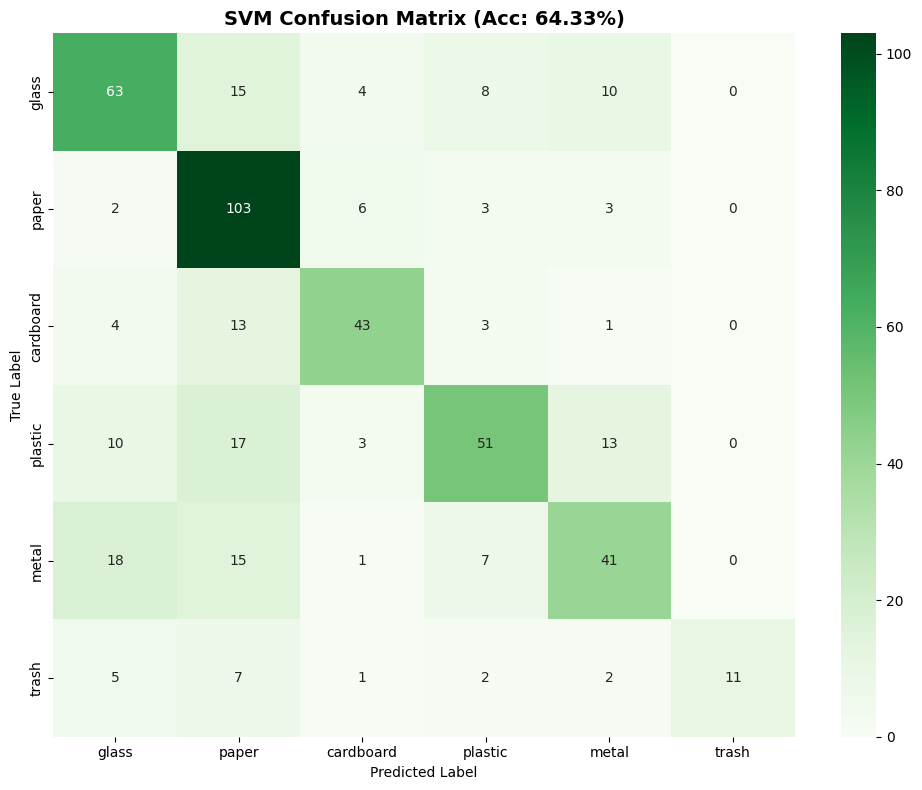

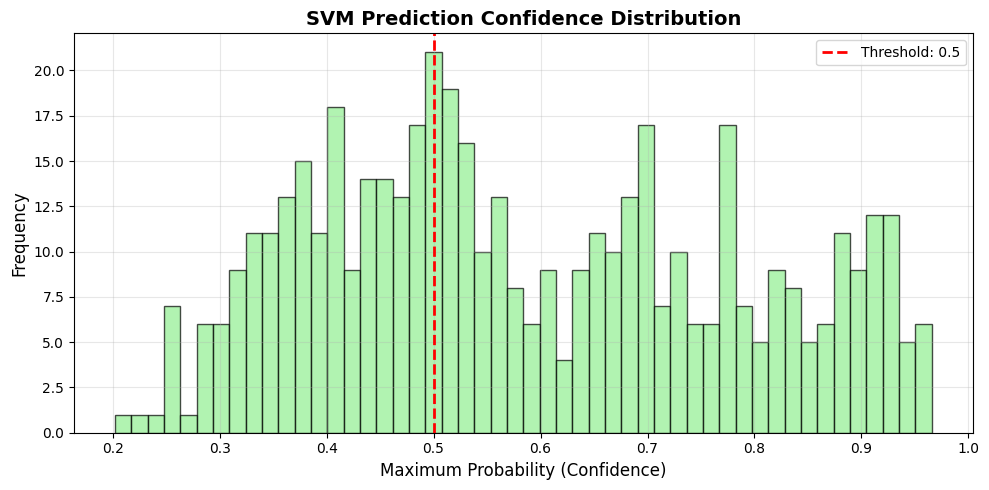


📊 Confidence Analysis:
  - Mean confidence: 0.5879
  - Median confidence: 0.5518
  - Min confidence: 0.2021
  - Max confidence: 0.9657


In [6]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import time
print("="*60)
print("SVM CLASSIFIER (with Unknown Rejection)")
print("="*60)

# Train SVM with probability=True for confidence scores
start_time = time.time()
svm = SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
train_time = time.time() - start_time

# Get prediction probabilities for confidence-based rejection
y_proba_svm = svm.predict_proba(X_test_scaled)
y_pred_svm = svm.predict(X_test_scaled)

# Implement Unknown rejection: if max probability < threshold, classify as "unknown" (ID 6)
confidence_threshold = 0.5  # Adjust this threshold based on performance
max_proba_svm = np.max(y_proba_svm, axis=1)

# Create predictions with unknown class
y_pred_svm_with_unknown = y_pred_svm.copy()
y_pred_svm_with_unknown[max_proba_svm < confidence_threshold] = 6  # ID 6 = unknown

# Calculate accuracies
svm_accuracy = svm.score(X_test_scaled, y_test) * 100
num_rejected_svm = np.sum(max_proba_svm < confidence_threshold)
rejection_rate_svm = (num_rejected_svm / len(y_test)) * 100

print(f"\n✓ Training completed in {train_time:.2f} seconds")
print(f"✓ Overall Accuracy (without rejection): {svm_accuracy:.2f}%")
print(f"✓ Rejection rate: {rejection_rate_svm:.2f}% ({num_rejected_svm}/{len(y_test)} samples)")
print(f"✓ Confidence threshold: {confidence_threshold}")

print("\n" + "="*60)
print("CLASSIFICATION REPORT (without rejection):")
print("="*60)
print(classification_report(y_test, y_pred_svm, target_names=actual_class_names, zero_division=0))

print("\n" + "="*60)
print("CONFUSION MATRIX:")
print("="*60)
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=actual_class_names,
            yticklabels=actual_class_names)
plt.title(f'SVM Confusion Matrix (Acc: {svm_accuracy:.2f}%)', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Show confidence distribution
plt.figure(figsize=(10, 5))
plt.hist(max_proba_svm, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(x=confidence_threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold: {confidence_threshold}')
plt.xlabel('Maximum Probability (Confidence)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('SVM Prediction Confidence Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Confidence Analysis:")
print(f"  - Mean confidence: {max_proba_svm.mean():.4f}")
print(f"  - Median confidence: {np.median(max_proba_svm):.4f}")
print(f"  - Min confidence: {max_proba_svm.min():.4f}")
print(f"  - Max confidence: {max_proba_svm.max():.4f}")